In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl
#import mdtraj as md
import matplotlib as mpl
#from nglview.player import TrajectoryPlayer
import os
import pandas
import ctb_md_analysis as ctb

## All of this is for nice formatting of figures:
# You can edit these at some point if you want to change the formatting of your figures
from matplotlib import cm
import matplotlib.pyplot as pl
from matplotlib import rcParams
from matplotlib import rc
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 20}
COLOR = 'black'
rcParams['text.color'] = 'black'
rcParams['axes.labelcolor'] = COLOR
rcParams['xtick.color'] = COLOR
rcParams['ytick.color'] = COLOR

rc('font', **font)

# Custom colormap code from: https://stackoverflow.com/questions/49367144/modify-matplotlib-colormap
import matplotlib as mpl
upper = mpl.cm.jet(np.arange(256))
lower = np.ones((int(256/4),4))
for i in range(3):
    lower[:,i] = np.linspace(1, upper[0,i], lower.shape[0])

cmap = np.vstack(( lower, upper ))
cmap = mpl.colors.ListedColormap(cmap, name='myColorMap', N=cmap.shape[0])

# READ THIS BEFORE CONTINUING

So unfortunately these files are too large to include in the GitHub, so within the README file (and here) I will post a link to Zenodo to download these different data types

The data relevant for plotting in this script can all be found here (https://doi.org/10.5281/zenodo.8347008) with the data size totalling 1GB

In [10]:
datDir = 'borowoska_boughter_data/root_mean_old/'
rmsd1h_2g02mut = pandas.read_csv(datDir + 'amber/2g02mutrmsd1h.dat',header=None)
rmsd2h_2g02mut = pandas.read_csv(datDir + 'amber/2g02mutrmsd2h.dat',header=None)
rmsd3h_2g02mut = pandas.read_csv(datDir + 'amber/2g02mutrmsd3h.dat',header=None)
rmsd1l_2g02mut = pandas.read_csv(datDir + 'amber/2g02mutrmsd1l.dat',header=None)
rmsd2l_2g02mut = pandas.read_csv(datDir + 'amber/2g02mutrmsd2l.dat',header=None)
rmsd3l_2g02mut = pandas.read_csv(datDir + 'amber/2g02mutrmsd3l.dat',header=None)

rmsd1h_2g02 = pandas.read_csv(datDir + 'amber/2G02rmsd1h.dat',header=None)
rmsd2h_2g02 = pandas.read_csv(datDir + 'amber/2G02rmsd2h.dat',header=None)
rmsd3h_2g02 = pandas.read_csv(datDir + 'amber/2G02rmsd3h.dat',header=None)
rmsd1l_2g02 = pandas.read_csv(datDir + 'amber/2G02rmsd1l.dat',header=None)
rmsd2l_2g02 = pandas.read_csv(datDir + 'amber/2G02rmsd2l.dat',header=None)
rmsd3l_2g02 = pandas.read_csv(datDir + 'amber/2G02rmsd3l.dat',header=None)

rmsd1h_3b03 = pandas.read_csv(datDir + 'amber/3B03rmsd1h.dat',header=None)
rmsd2h_3b03 = pandas.read_csv(datDir + 'amber/3B03rmsd2h.dat',header=None)
rmsd3h_3b03 = pandas.read_csv(datDir + 'amber/3B03rmsd3h.dat',header=None)
rmsd1l_3b03 = pandas.read_csv(datDir + 'amber/3B03rmsd1l.dat',header=None)
rmsd2l_3b03 = pandas.read_csv(datDir + 'amber/3B03rmsd2l.dat',header=None)
rmsd3l_3b03 = pandas.read_csv(datDir + 'amber/3B03rmsd3l.dat',header=None)

rmsd1h_338e6 = pandas.read_csv(datDir + 'amber/338E6rmsd1h.dat',header=None)
rmsd2h_338e6 = pandas.read_csv(datDir + 'amber/338E6rmsd2h.dat',header=None)
rmsd3h_338e6 = pandas.read_csv(datDir + 'amber/338E6rmsd3h.dat',header=None)
rmsd1l_338e6 = pandas.read_csv(datDir + 'amber/338E6rmsd1l.dat',header=None)
rmsd2l_338e6 = pandas.read_csv(datDir + 'amber/338E6rmsd2l.dat',header=None)
rmsd3l_338e6 = pandas.read_csv(datDir + 'amber/338E6rmsd3l.dat',header=None)

rmsd1h_43g10 = pandas.read_csv(datDir + 'amber/43g10rmsd1h.dat',header=None)
rmsd2h_43g10 = pandas.read_csv(datDir + 'amber/43g10rmsd2h.dat',header=None)
rmsd3h_43g10 = pandas.read_csv(datDir + 'amber/43g10rmsd3h.dat',header=None)
rmsd1l_43g10 = pandas.read_csv(datDir + 'amber/43g10rmsd1l.dat',header=None)
rmsd2l_43g10 = pandas.read_csv(datDir + 'amber/43g10rmsd2l.dat',header=None)
rmsd3l_43g10 = pandas.read_csv(datDir + 'amber/43g10rmsd3l.dat',header=None)

rmsd1h_4c05 = pandas.read_csv(datDir + 'amber/4c05rmsd1h.dat',header=None)
rmsd2h_4c05 = pandas.read_csv(datDir + 'amber/4c05rmsd2h.dat',header=None)
rmsd3h_4c05 = pandas.read_csv(datDir + 'amber/4c05rmsd3h.dat',header=None)
rmsd1l_4c05 = pandas.read_csv(datDir + 'amber/4c05rmsd1l.dat',header=None)
rmsd2l_4c05 = pandas.read_csv(datDir + 'amber/4c05rmsd2l.dat',header=None)
rmsd3l_4c05 = pandas.read_csv(datDir + 'amber/4c05rmsd3l.dat',header=None)

Text(0.5, 1.0, '2g02')

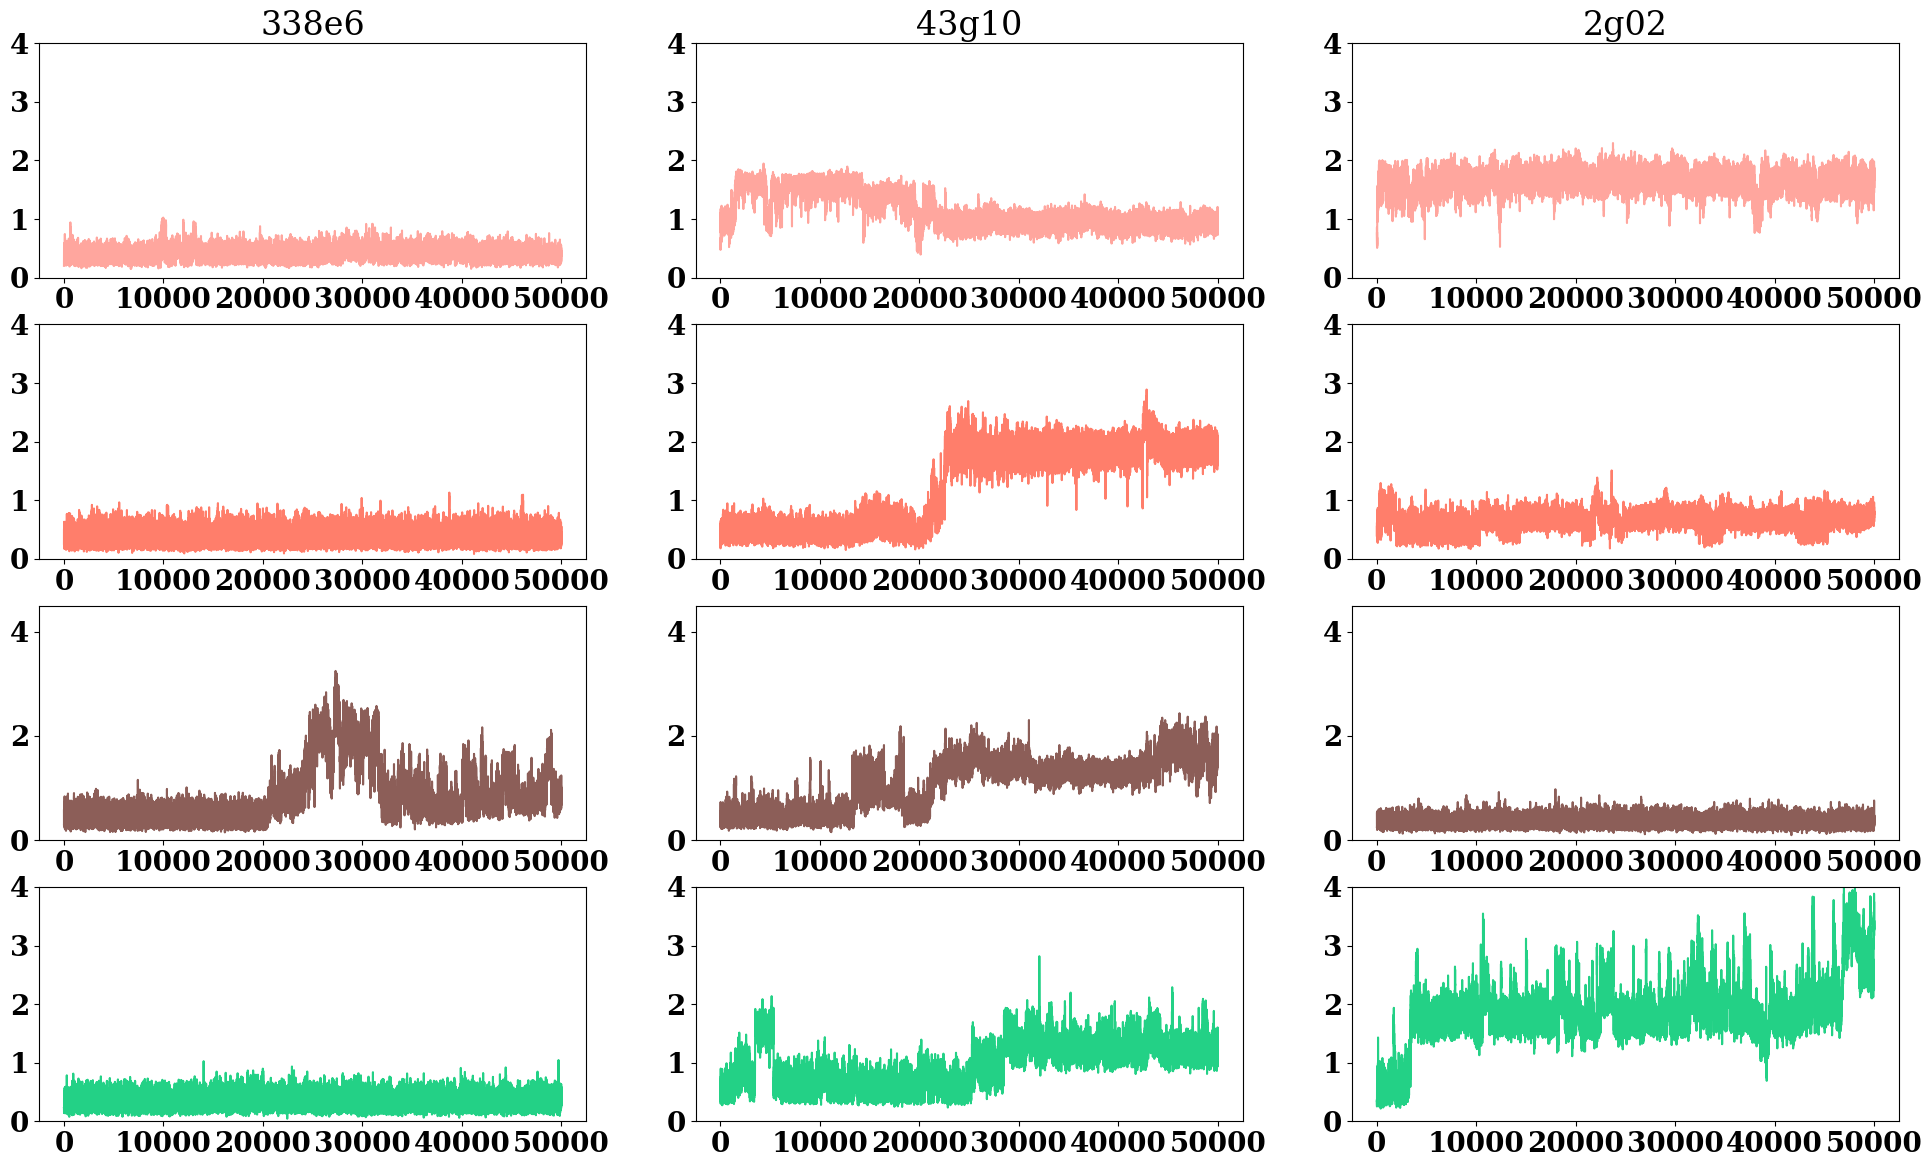

In [13]:
fig, ax = pl.subplots(4, 3,squeeze=False,figsize=(24,14))
ax[0,0].set_ylim([0,4]);ax[0,1].set_ylim([0,4]);ax[0,2].set_ylim([0,4])
ax[1,0].set_ylim([0,4]);ax[1,1].set_ylim([0,4]);ax[1,2].set_ylim([0,4])
ax[2,0].set_ylim([0,4.5]);ax[2,1].set_ylim([0,4.5]);ax[2,2].set_ylim([0,4.5])
ax[3,0].set_ylim([0,4]);ax[3,1].set_ylim([0,4]);ax[3,2].set_ylim([0,4])

ax[0,0].plot(rmsd3h_338e6*10,'#FFA69E')
ax[1,0].plot(rmsd2h_338e6*10,'#FF7E6B')
ax[2,0].plot(rmsd1h_338e6*10,'#8C5E58')
ax[3,0].plot(rmsd1l_338e6*10,'#23D186')

ax[0,1].plot(rmsd3h_43g10*10,'#FFA69E')
ax[1,1].plot(rmsd2h_43g10*10,'#FF7E6B')
ax[2,1].plot(rmsd1h_43g10*10,'#8C5E58')
ax[3,1].plot(rmsd1l_43g10*10,'#23D186')

ax[0,2].plot(rmsd3h_2g02*10,'#FFA69E')
ax[1,2].plot(rmsd2h_2g02*10,'#FF7E6B')
ax[2,2].plot(rmsd1h_2g02*10,'#8C5E58')
ax[3,2].plot(rmsd1l_2g02*10,'#23D186')

ax[0,0].set_title('338e6')
ax[0,1].set_title('43g10')
ax[0,2].set_title('2g02')

#pl.savefig('old_rmsd_poly.pdf',format='pdf')

Text(0.5, 1.0, '2g02 Mut')

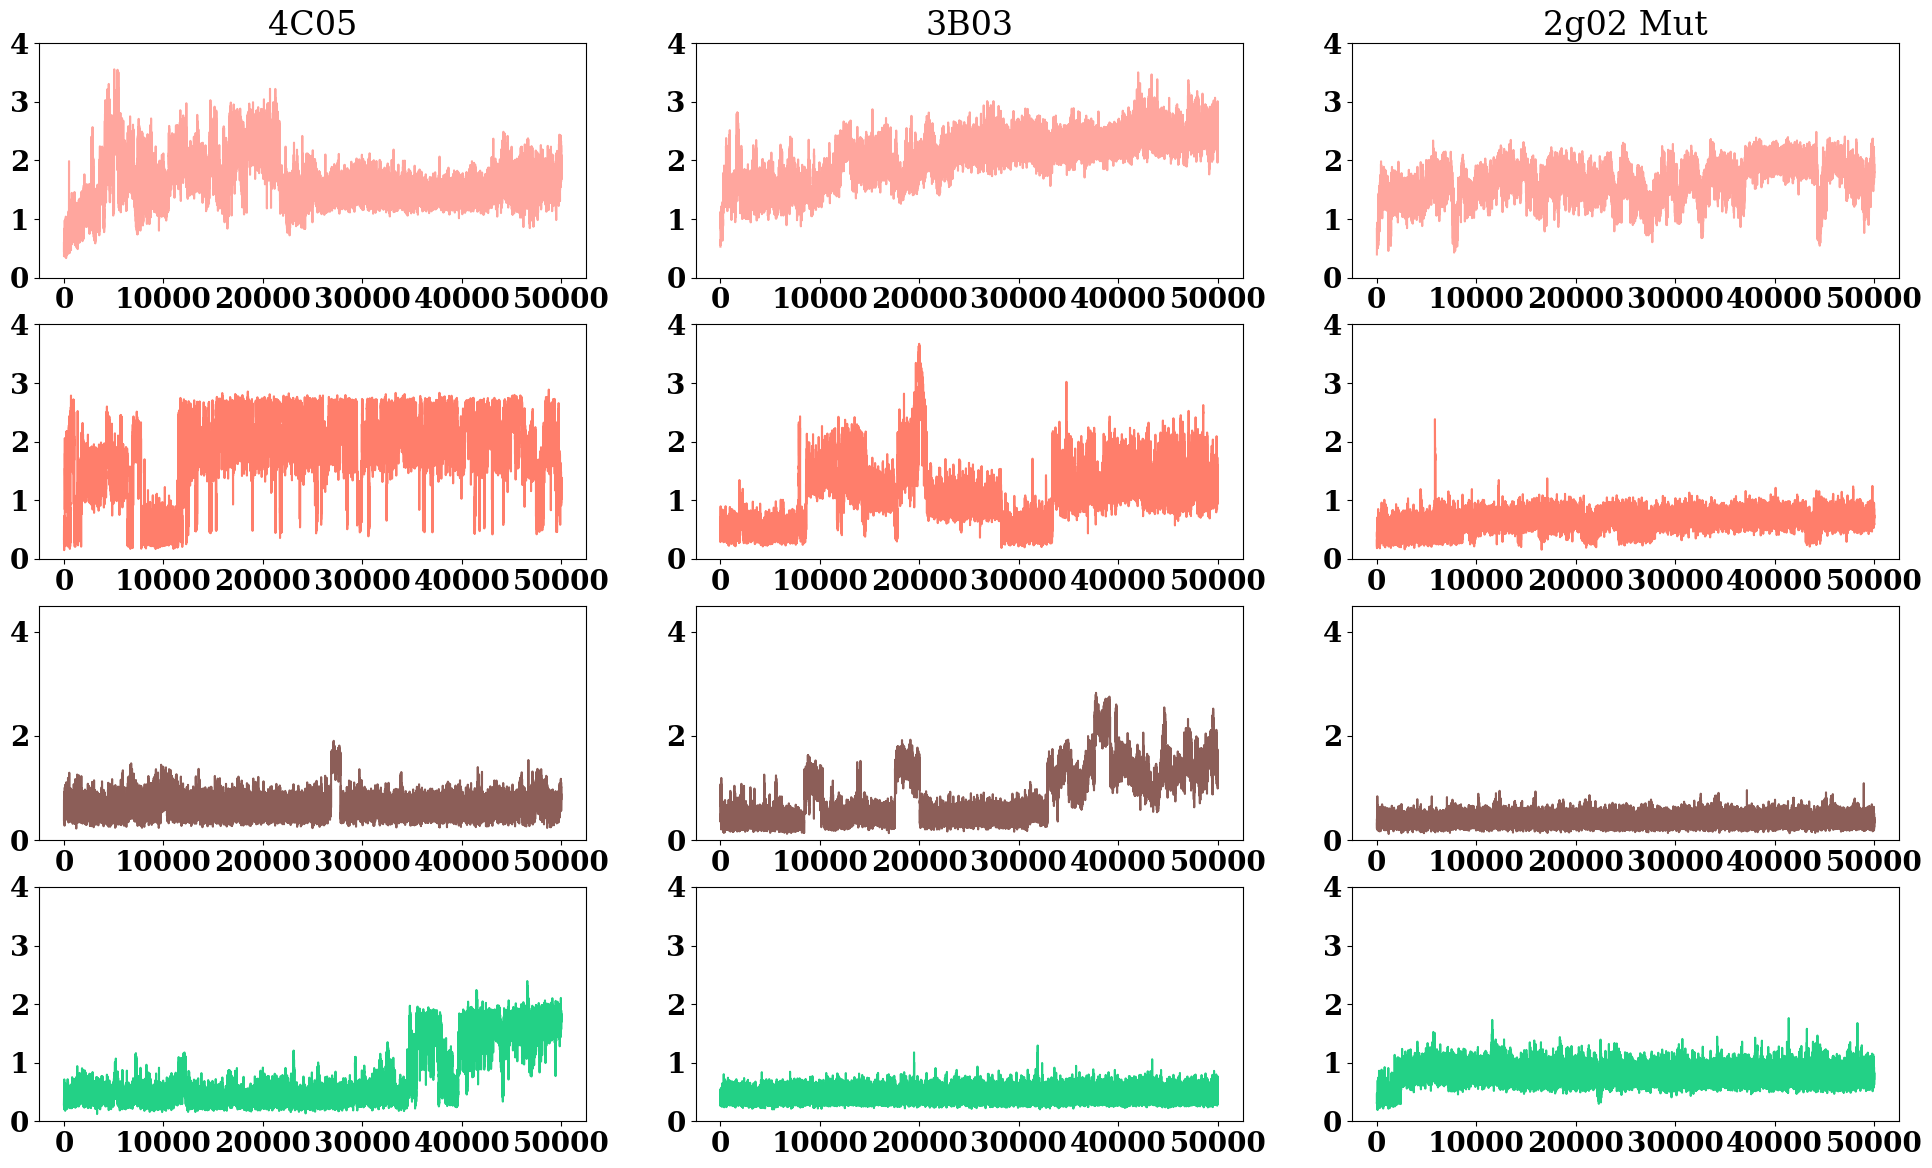

In [14]:
fig, ax = pl.subplots(4, 3,squeeze=False,figsize=(24,14))
ax[0,0].set_ylim([0,4]);ax[0,1].set_ylim([0,4]);ax[0,2].set_ylim([0,4])
ax[1,0].set_ylim([0,4]);ax[1,1].set_ylim([0,4]);ax[1,2].set_ylim([0,4])
ax[2,0].set_ylim([0,4.5]);ax[2,1].set_ylim([0,4.5]);ax[2,2].set_ylim([0,4.5])
ax[3,0].set_ylim([0,4]);ax[3,1].set_ylim([0,4]);ax[3,2].set_ylim([0,4])

ax[0,0].plot(rmsd3h_4c05*10,'#FFA69E')
ax[1,0].plot(rmsd2h_4c05*10,'#FF7E6B')
ax[2,0].plot(rmsd1h_4c05*10,'#8C5E58')
ax[3,0].plot(rmsd1l_4c05*10,'#23D186')

ax[0,1].plot(rmsd3h_3b03*10,'#FFA69E')
ax[1,1].plot(rmsd2h_3b03*10,'#FF7E6B')
ax[2,1].plot(rmsd1h_3b03*10,'#8C5E58')
ax[3,1].plot(rmsd1l_3b03*10,'#23D186')

ax[0,2].plot(rmsd3h_2g02mut*10,'#FFA69E')
ax[1,2].plot(rmsd2h_2g02mut*10,'#FF7E6B')
ax[2,2].plot(rmsd1h_2g02mut*10,'#8C5E58')
ax[3,2].plot(rmsd1l_2g02mut*10,'#23D186')

ax[0,0].set_title('4C05')
ax[0,1].set_title('3B03')
ax[0,2].set_title('2g02 Mut')

#pl.savefig('old_rmsd_nonpoly.pdf',format='pdf')

In [2]:
datDir = 'borowoska_boughter_data/root_mean_new/'
rmsd1h_CR9114 = pandas.read_csv(datDir + 'CR9114rmsd1h.dat',header=None)
rmsd2h_CR9114 = pandas.read_csv(datDir + 'CR9114rmsd2h.dat',header=None)
rmsd3h_CR9114 = pandas.read_csv(datDir + 'CR9114rmsd3h.dat',header=None)
rmsd1l_CR9114 = pandas.read_csv(datDir + 'CR9114rmsd1l.dat',header=None)
rmsd2l_CR9114 = pandas.read_csv(datDir + 'CR9114rmsd2l.dat',header=None)
rmsd3l_CR9114 = pandas.read_csv(datDir + 'CR9114rmsd3l.dat',header=None)

rmsd1h_F16 = pandas.read_csv(datDir + 'F16rmsd1h.dat',header=None)
rmsd2h_F16 = pandas.read_csv(datDir + 'F16rmsd2h.dat',header=None)
rmsd3h_F16 = pandas.read_csv(datDir + 'F16rmsd3h.dat',header=None)
rmsd1l_F16 = pandas.read_csv(datDir + 'F16rmsd1l.dat',header=None)
rmsd2l_F16 = pandas.read_csv(datDir + 'F16rmsd2l.dat',header=None)
rmsd3l_F16 = pandas.read_csv(datDir + 'F16rmsd3l.dat',header=None)

rmsd1h_CH65 = pandas.read_csv(datDir + 'CH65rmsd1h.dat',header=None)
rmsd2h_CH65 = pandas.read_csv(datDir + 'CH65rmsd2h.dat',header=None)
rmsd3h_CH65 = pandas.read_csv(datDir + 'CH65rmsd3h.dat',header=None)
rmsd1l_CH65 = pandas.read_csv(datDir + 'CH65rmsd1l.dat',header=None)
rmsd2l_CH65 = pandas.read_csv(datDir + 'CH65rmsd2l.dat',header=None)
rmsd3l_CH65 = pandas.read_csv(datDir + 'CH65rmsd3l.dat',header=None)

rmsd1h_1F02 = pandas.read_csv(datDir + '1F02rmsd1h.dat',header=None)
rmsd2h_1F02 = pandas.read_csv(datDir + '1F02rmsd2h.dat',header=None)
rmsd3h_1F02 = pandas.read_csv(datDir + '1F02rmsd3h.dat',header=None)
rmsd1l_1F02 = pandas.read_csv(datDir + '1F02rmsd1l.dat',header=None)
rmsd2l_1F02 = pandas.read_csv(datDir + '1F02rmsd2l.dat',header=None)
rmsd3l_1F02 = pandas.read_csv(datDir + '1F02rmsd3l.dat',header=None)

Text(0.5, 1.0, 'F16')

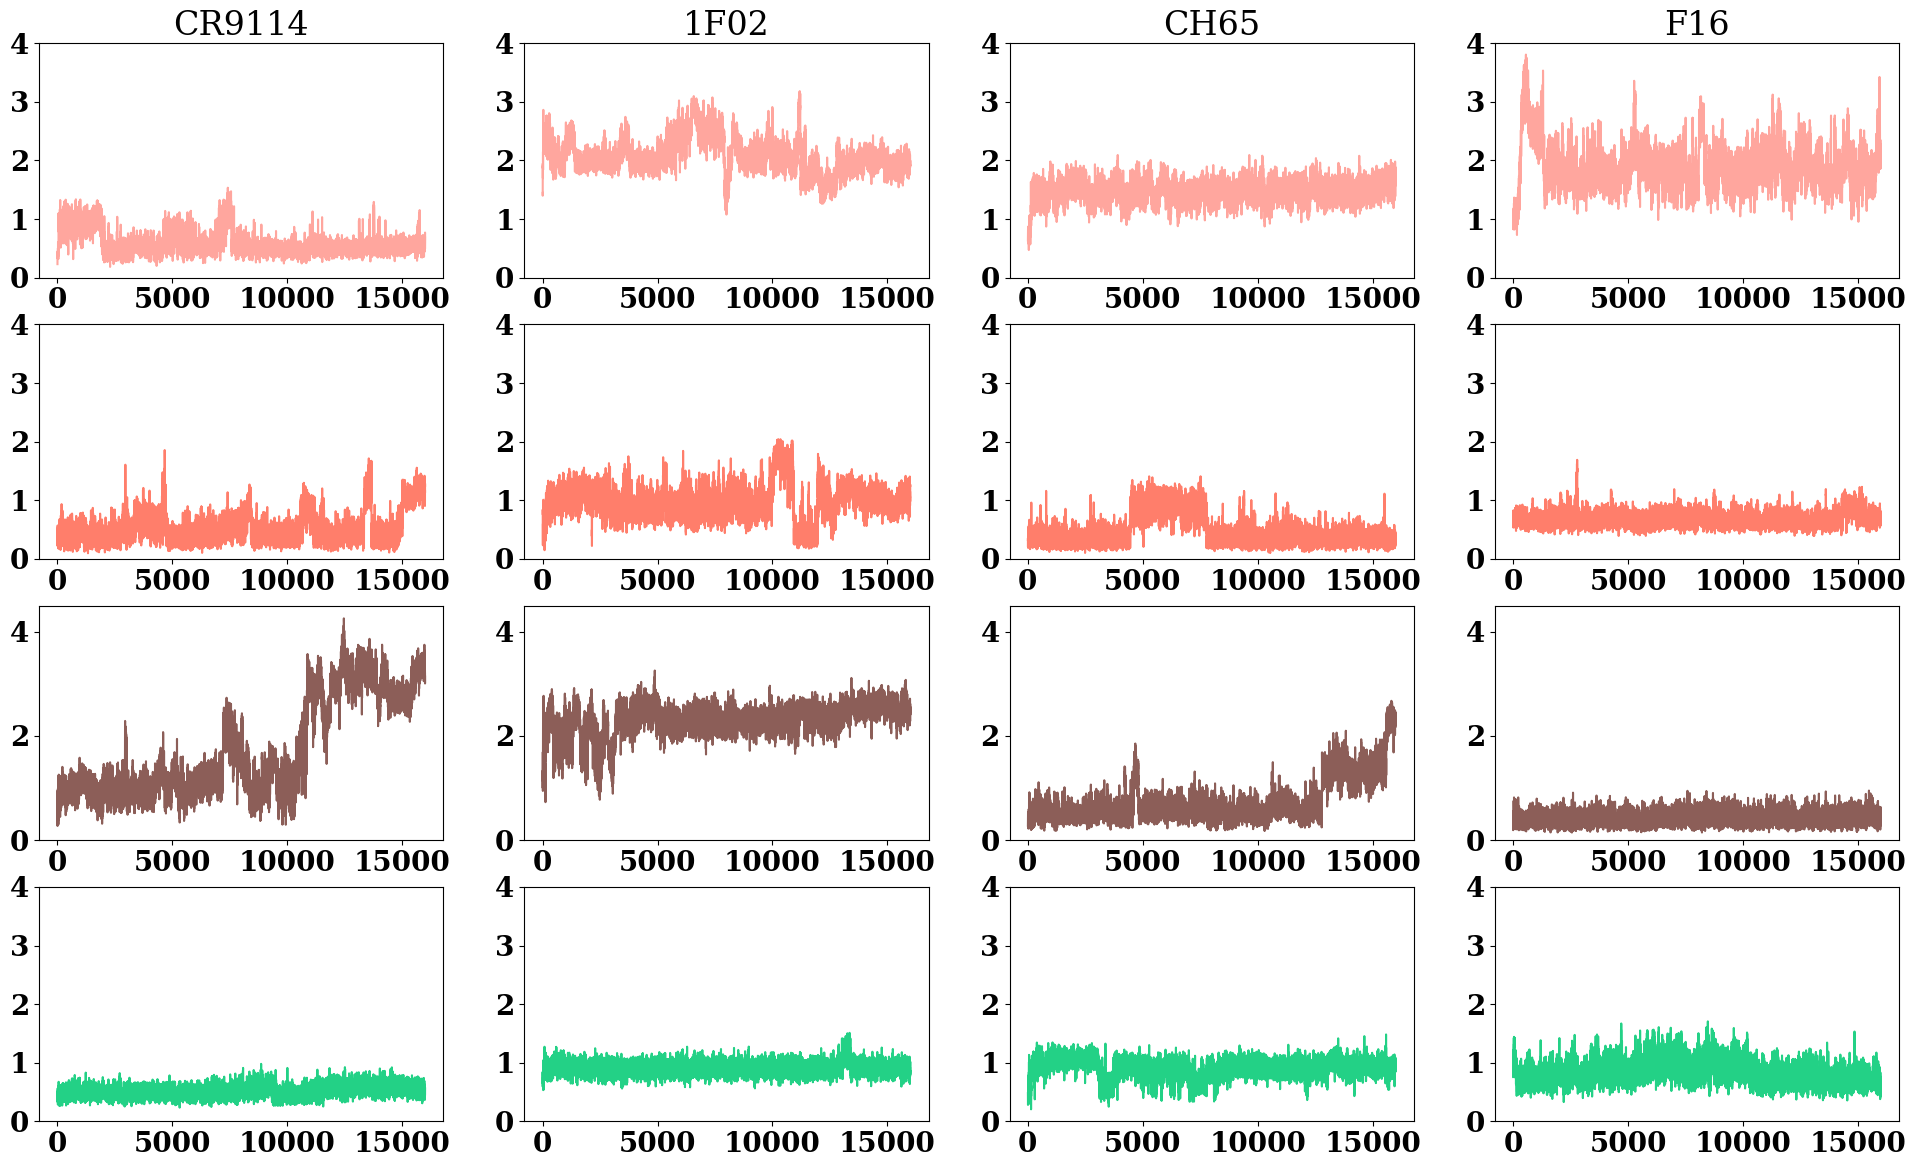

In [3]:
fig, ax = pl.subplots(4, 4,squeeze=False,figsize=(24,14))
ax[0,0].set_ylim([0,4]);ax[0,1].set_ylim([0,4]);ax[0,2].set_ylim([0,4]);ax[0,3].set_ylim([0,4])
ax[1,0].set_ylim([0,4]);ax[1,1].set_ylim([0,4]);ax[1,2].set_ylim([0,4]);ax[1,3].set_ylim([0,4])
ax[2,0].set_ylim([0,4.5]);ax[2,1].set_ylim([0,4.5]);ax[2,2].set_ylim([0,4.5]);ax[2,3].set_ylim([0,4.5])
ax[3,0].set_ylim([0,4]);ax[3,1].set_ylim([0,4]);ax[3,2].set_ylim([0,4]);ax[3,3].set_ylim([0,4])

ax[0,0].plot(rmsd3h_CR9114*10,'#FFA69E')
ax[1,0].plot(rmsd2h_CR9114*10,'#FF7E6B')
ax[2,0].plot(rmsd1h_CR9114*10,'#8C5E58')
ax[3,0].plot(rmsd1l_CR9114*10,'#23D186')

ax[0,1].plot(rmsd3h_1F02*10,'#FFA69E')
ax[1,1].plot(rmsd2h_1F02*10,'#FF7E6B')
ax[2,1].plot(rmsd1h_1F02*10,'#8C5E58')
ax[3,1].plot(rmsd1l_1F02*10,'#23D186')

ax[0,2].plot(rmsd3h_CH65*10,'#FFA69E')
ax[1,2].plot(rmsd2h_CH65*10,'#FF7E6B')
ax[2,2].plot(rmsd1h_CH65*10,'#8C5E58')
ax[3,2].plot(rmsd1l_CH65*10,'#23D186')

ax[0,3].plot(rmsd3h_F16*10,'#FFA69E')
ax[1,3].plot(rmsd2h_F16*10,'#FF7E6B')
ax[2,3].plot(rmsd1h_F16*10,'#8C5E58')
ax[3,3].plot(rmsd1l_F16*10,'#23D186')


ax[0,0].set_title('CR9114')
ax[0,1].set_title('1F02')
ax[0,2].set_title('CH65')
ax[0,3].set_title('F16')

#pl.savefig('new_rmsd_namd.pdf',format='pdf')

# Alright now we need to try to do the same thing and read in all the RMSF

# Alright so the way we're going to do stats is going to be... a little bit insane

You can't just straight up average/take the stdev of the RMSF. You're taking an average of a square-root time average... not right

So, instead, lets use our favorite statistical trick (permuting data/bootstrapping). The former will be used to calculate statistical significance (permutation test) and the latter will be used for more reliable error bars.

Essentially we're going to try to stack all of our data, taken *out* of the time averaging (by multiplying by number of nanoseconds) we will then do our tricks (permutation/bootstrap)

These permutations or bootstraps will still maintain the total number of nanoseconds, which we will then use to "project" back into the RMSF.

From these we'll now have either a bunch of p-values OR a large dataframe of bootstraped RMSF that we can then average/stdev

I hope all of this makes some sense. The code should be straightforward enough to go through...

In [10]:
addDir = 'borowska_boughter_data/FINAL_rmsf/amber/'

amber_F16_rmsf = pandas.read_csv(addDir+'F16rmsfFULL.dat',header=None,sep='\s+')
amber_CH65_rmsf = pandas.read_csv(addDir+'CH65rmsfFULL.dat',header=None,sep='\s+')
amber_CR9114_rmsf = pandas.read_csv(addDir+'CR9114rmsfFULL.dat',header=None,sep='\s+')
amber_a1F02_rmsf = pandas.read_csv(addDir+'1F02rmsfFULL.dat',header=None,sep='\s+')
amber_a43g10_rmsf = pandas.read_csv(addDir+'43g10rmsfFULL.dat',header=None,sep='\s+')
amber_a2g02_rmsf = pandas.read_csv(addDir+'2G02rmsfFULL.dat',header=None,sep='\s+')
amber_a338e6_rmsf = pandas.read_csv(addDir+'338E6rmsfFULL.dat',header=None,sep='\s+')
amber_a2g02mut_rmsf = pandas.read_csv(addDir+'2g02mutrmsfFULL.dat',header=None,sep='\s+')
amber_a3b03_rmsf = pandas.read_csv(addDir+'3B03rmsfFULL.dat',header=None,sep='\s+')
amber_a4c05_rmsf = pandas.read_csv(addDir+'4c05rmsfFULL.dat',header=None,sep='\s+')

addDir = 'borowska_boughter_data/FINAL_rmsf/amber2/'

amber2_F16_rmsf = pandas.read_csv(addDir+'F16rmsfFULL.dat',header=None,sep='\s+')
amber2_CH65_rmsf = pandas.read_csv(addDir+'CH65rmsfFULL.dat',header=None,sep='\s+')
amber2_CR9114_rmsf = pandas.read_csv(addDir+'CR9114rmsfFULL.dat',header=None,sep='\s+')
amber2_a1F02_rmsf = pandas.read_csv(addDir+'1F02rmsfFULL.dat',header=None,sep='\s+')
amber2_a43g10_rmsf = pandas.read_csv(addDir+'43g10rmsfFULL.dat',header=None,sep='\s+')
amber2_a2g02_rmsf = pandas.read_csv(addDir+'2G02rmsfFULL.dat',header=None,sep='\s+')
amber2_a338e6_rmsf = pandas.read_csv(addDir+'338E6rmsfFULL.dat',header=None,sep='\s+')
amber2_a2g02mut_rmsf = pandas.read_csv(addDir+'2g02mutrmsfFULL.dat',header=None,sep='\s+')
amber2_a3b03_rmsf = pandas.read_csv(addDir+'3B03rmsfFULL.dat',header=None,sep='\s+')
amber2_a4c05_rmsf = pandas.read_csv(addDir+'4c05rmsfFULL.dat',header=None,sep='\s+')

addDir = 'borowska_boughter_data/FINAL_rmsf/namd/'

namd_F16_rmsf = pandas.read_csv(addDir+'F16rmsfFULL.dat',header=None,sep='\s+')
namd_CH65_rmsf = pandas.read_csv(addDir+'CH65rmsfFULL.dat',header=None,sep='\s+')
namd_CR9114_rmsf = pandas.read_csv(addDir+'CR9114rmsfFULL.dat',header=None,sep='\s+')
namd_a1F02_rmsf = pandas.read_csv(addDir+'1F02rmsfFULL.dat',header=None,sep='\s+')
namd_a43g10_rmsf = pandas.read_csv(addDir+'43g10rmsfFULL.dat',header=None,sep='\s+')
namd_a2g02_rmsf = pandas.read_csv(addDir+'2G02rmsfFULL.dat',header=None,sep='\s+')
namd_a338e6_rmsf = pandas.read_csv(addDir+'338E6rmsfFULL.dat',header=None,sep='\s+')
namd_a2g02mut_rmsf = pandas.read_csv(addDir+'2g02mutrmsfFULL.dat',header=None,sep='\s+')
namd_a3b03_rmsf = pandas.read_csv(addDir+'3B03rmsfFULL.dat',header=None,sep='\s+')
namd_a4c05_rmsf = pandas.read_csv(addDir+'4c05rmsfFULL.dat',header=None,sep='\s+')

# Well, for better or worse, it looks like this *almost* exactly recapitulates the average...

In [11]:
dd = 250; x = ctb.get_rmsf(amber_a2g02_rmsf,'2g02',dyns=dd)
dd = 125; x2 = ctb.get_rmsf(amber2_a2g02_rmsf,'2g02',dyns=dd)
dd = 250; x3 = ctb.get_rmsf(namd_a2g02_rmsf,'2g02',dyns=dd)
compile_2g02 = ctb.rmsf_compile(x,1000,250,x2,500,125,x3,500,250)

dd = 250; a = ctb.get_rmsf(amber_a2g02mut_rmsf,'2g02mut',dyns=dd)
dd = 125; a2 = ctb.get_rmsf(amber2_a2g02mut_rmsf,'2g02mut',dyns=dd)
dd = 250; a3 = ctb.get_rmsf(namd_a2g02mut_rmsf,'2g02mut',dyns=dd)
compile_2g02mut = ctb.rmsf_compile(a,1000,250,a2,500,125,a3,500,250)

dd = 250; y = ctb.get_rmsf(amber_a338e6_rmsf,'338e6',dyns=dd)
dd = 125; y2 = ctb.get_rmsf(amber2_a338e6_rmsf,'338e6',dyns=dd)
dd = 250; y3 = ctb.get_rmsf(namd_a338e6_rmsf,'338e6',dyns=dd)
compile_338e6 = ctb.rmsf_compile(y,1000,250,y2,500,125,y3,500,250)

dd = 250; z = ctb.get_rmsf(amber_a3b03_rmsf,'3b03',dyns=dd)
dd = 125; z2 = ctb.get_rmsf(amber2_a3b03_rmsf,'3b03',dyns=dd)
dd = 250; z3 = ctb.get_rmsf(namd_a3b03_rmsf,'3b03',dyns=dd)
compile_3b03 = ctb.rmsf_compile(z,1000,250,z2,500,125,z3,500,250)

dd = 250; b = ctb.get_rmsf(amber_a43g10_rmsf,'43g10',dyns=dd)
dd = 125; b2 = ctb.get_rmsf(amber2_a43g10_rmsf,'43g10',dyns=dd)
dd = 250; b3 = ctb.get_rmsf(namd_a43g10_rmsf,'43g10',dyns=dd)
compile_43g10 = ctb.rmsf_compile(b,500,125,b2,500,125,b3,500,250)

dd = 250; c = ctb.get_rmsf(amber_a4c05_rmsf,'4c05',dyns=dd)
dd = 125; c2 = ctb.get_rmsf(amber2_a4c05_rmsf,'4c05',dyns=dd)
dd = 230; c3 = ctb.get_rmsf(namd_a4c05_rmsf,'4c05',dyns=dd)
compile_4c05 = ctb.rmsf_compile(c,1000,250,c2,500,125,c3,460,230)

dd = 75; d = ctb.get_rmsf(amber_F16_rmsf,'F16',dyns=dd)
dd = 75; d2 = ctb.get_rmsf(amber2_F16_rmsf,'F16',dyns=dd)
dd = 75; d3 = ctb.get_rmsf(namd_F16_rmsf,'F16',dyns=dd)
compile_f16 = ctb.rmsf_compile(d,300,75,d2,300,75,d3,300,75)

dd = 75; e = ctb.get_rmsf(amber_a1F02_rmsf,'1F02',dyns=dd)
dd = 75; e2 = ctb.get_rmsf(amber2_a1F02_rmsf,'1F02',dyns=dd)
dd = 75; e3 = ctb.get_rmsf(namd_a1F02_rmsf,'1F02',dyns=dd)
compile_1f02 = ctb.rmsf_compile(e,300,75,e2,300,75,e3,300,75)

dd = 75; f = ctb.get_rmsf(amber_CR9114_rmsf,'CR9114',dyns=dd)
dd = 75; f2 = ctb.get_rmsf(amber2_CR9114_rmsf,'CR9114',dyns=dd)
dd = 75; f3 = ctb.get_rmsf(namd_CR9114_rmsf,'CR9114',dyns=dd)
compile_cr9114 = ctb.rmsf_compile(f,300,75,f2,300,75,f3,300,75)

dd = 75; g = ctb.get_rmsf(amber_CH65_rmsf,'CH65',dyns=dd)
dd = 75; g2 = ctb.get_rmsf(amber2_CH65_rmsf,'CH65',dyns=dd)
dd = 75; g3 = ctb.get_rmsf(namd_CH65_rmsf,'CH65',dyns=dd)
compile_ch65 = ctb.rmsf_compile(g,300,75,g2,300,75,g3,300,75)

# Alright so when looking at each individual loop, you need to plot (this cell) AND do statistics (next cell) at the same time.
Otherwise you'll need to copy and paste the code blocked off by ### to select out individual loops for statistical analysis

(-0.1, 1.55)

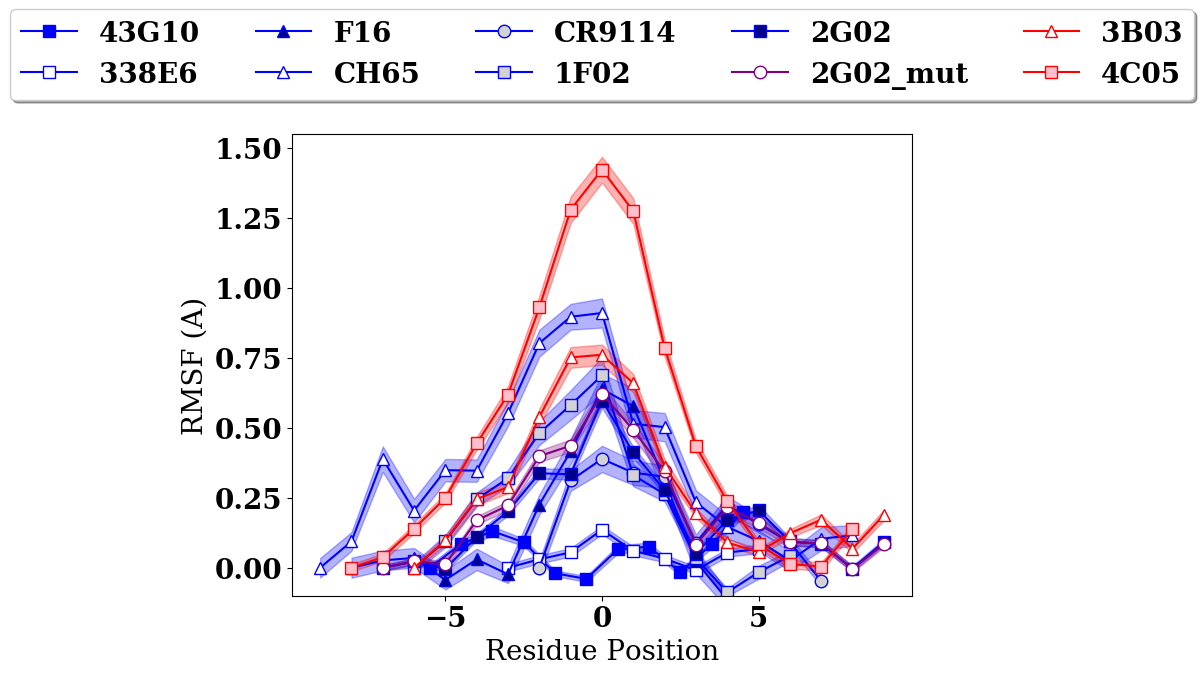

In [12]:
######################################################################################
loop = 5

# Alright so be careful, obviously as the time goes down, the RMSF goes up...
avg_4c05,std_4c05 = ctb.rmsf_boot(compile_4c05,totTime1=1960,num_reps = 1000,loop=loop)
avg_43g10,std_43g10 = ctb.rmsf_boot(compile_43g10,totTime1=2000,num_reps = 1000,loop=loop)
avg_338e6,std_338e6 = ctb.rmsf_boot(compile_338e6,totTime1=2000,num_reps = 1000,loop=loop)
avg_3b03,std_3b03 = ctb.rmsf_boot(compile_3b03,totTime1=2000,num_reps = 1000,loop=loop)
avg_2g02,std_2g02 = ctb.rmsf_boot(compile_2g02,totTime1=2000,num_reps = 1000,loop=loop)
avg_2g02mut,std_2g02mut = ctb.rmsf_boot(compile_2g02mut,totTime1=2000,num_reps = 1000,loop=loop)
# Now we add in the new shit!
avg_f16,std_f16 = ctb.rmsf_boot(compile_f16,totTime1=900,num_reps = 1000,loop=loop)
avg_ch65,std_ch65 = ctb.rmsf_boot(compile_ch65,totTime1=900,num_reps = 1000,loop=loop)
avg_cr9114,std_cr9114 = ctb.rmsf_boot(compile_cr9114,totTime1=900,num_reps = 1000,loop=loop)
avg_1f02,std_1f02 = ctb.rmsf_boot(compile_1f02,totTime1=900,num_reps = 1000,loop=loop)

# Multiple everything by 10 to scale things properly
avg_1f02 = avg_1f02*10; avg_2g02 = avg_2g02*10; avg_2g02mut = avg_2g02mut*10
std_1f02 = std_1f02*10; std_2g02 = std_2g02*10; std_2g02mut = std_2g02mut*10

avg_f16 = avg_f16*10; avg_4c05 = avg_4c05*10; avg_338e6 = avg_338e6*10
std_f16 = std_f16*10; std_4c05 = std_4c05*10; std_338e6 = std_338e6*10

avg_3b03 = avg_3b03*10; avg_cr9114 = avg_cr9114*10; avg_43g10 = avg_43g10*10
std_3b03 = std_3b03*10; std_cr9114 = std_cr9114*10; std_43g10 = std_43g10*10

avg_ch65 = avg_ch65*10
std_ch65 = std_ch65*10
######################################################################################


fig, ax = pl.subplots(1, 1,squeeze=False,figsize=(8,6))


# 43g10 the most flexible residue is at the END of CDR3, so need to code it a little differently...
pl.plot(np.arange(len(avg_43g10))-len(avg_43g10)/2,avg_43g10-avg_43g10[0],color='blue', linestyle='solid', marker='s',markersize=9,markerfacecolor='blue')
pl.fill_between(np.arange(len(avg_43g10))-len(avg_43g10)/2,avg_43g10+std_43g10*2-avg_43g10[0],avg_43g10-std_43g10*2-avg_43g10[0],alpha=0.3,color='blue')
# 338e6
pl.plot(np.arange(len(avg_338e6))-list(avg_338e6).index(max(avg_338e6)),avg_338e6-avg_338e6[0],color='blue', linestyle='solid', marker='s',markersize=9,markerfacecolor='white')
pl.fill_between(np.arange(len(avg_338e6))-list(avg_338e6).index(max(avg_338e6)),avg_338e6+std_338e6*2-avg_338e6[0],avg_338e6-std_338e6*2-avg_338e6[0],alpha=0.3,color='blue')
# F16
pl.plot(np.arange(len(avg_f16))-list(avg_f16).index(max(avg_f16)),avg_f16-avg_f16[0],color='blue', linestyle='solid', marker='^',markersize=9,markerfacecolor='darkblue')
pl.fill_between(np.arange(len(avg_f16))-list(avg_f16).index(max(avg_f16)),avg_f16+std_f16*2-avg_f16[0],avg_f16-std_f16*2-avg_f16[0],alpha=0.3,color='blue')
# ch65
pl.plot(np.arange(len(avg_ch65))-list(avg_ch65).index(max(avg_ch65)),avg_ch65-avg_ch65[0],color='blue', linestyle='solid', marker='^',markersize=9,markerfacecolor='white')
pl.fill_between(np.arange(len(avg_ch65))-list(avg_ch65).index(max(avg_ch65)),avg_ch65+std_ch65*2-avg_ch65[0],avg_ch65-std_ch65*2-avg_ch65[0],alpha=0.3,color='blue')
# cr9114
pl.plot(np.arange(len(avg_cr9114))-list(avg_cr9114).index(max(avg_cr9114)),avg_cr9114-avg_cr9114[0],color='blue', linestyle='solid', marker='o',markersize=9,markerfacecolor='lightgrey')
pl.fill_between(np.arange(len(avg_cr9114))-list(avg_cr9114).index(max(avg_cr9114)),avg_cr9114+std_cr9114*2-avg_cr9114[0],avg_cr9114-std_cr9114*2-avg_cr9114[0],alpha=0.3,color='blue')
# 1f02
pl.plot(np.arange(len(avg_1f02))-list(avg_1f02).index(max(avg_1f02)),avg_1f02-avg_1f02[0],color='blue', linestyle='solid', marker='s',markersize=9,markerfacecolor='lightgrey')
pl.fill_between(np.arange(len(avg_1f02))-list(avg_1f02).index(max(avg_1f02)),avg_1f02+std_1f02*2-avg_1f02[0],avg_1f02-std_1f02*2-avg_1f02[0],alpha=0.3,color='blue')
# 2g02
pl.plot(np.arange(len(avg_2g02))-list(avg_2g02).index(max(avg_2g02)),avg_2g02-avg_2g02[0],color='blue', linestyle='solid', marker='s',markersize=9,markerfacecolor='darkblue')
pl.fill_between(np.arange(len(avg_2g02))-list(avg_2g02).index(max(avg_2g02)),avg_2g02-avg_2g02[0]+std_2g02*2,avg_2g02-avg_2g02[0]-std_2g02*2,alpha=0.3,color='blue')
# 2g02mut
pl.plot(np.arange(len(avg_2g02mut))-list(avg_2g02mut).index(max(avg_2g02mut)),avg_2g02mut-avg_2g02mut[0],color='purple', linestyle='solid', marker='o',markersize=9,markerfacecolor='white')
pl.fill_between(np.arange(len(avg_2g02mut))-list(avg_2g02mut).index(max(avg_2g02mut)),avg_2g02mut-avg_2g02mut[0]+std_2g02mut*2,avg_2g02mut-avg_2g02mut[0]-std_2g02mut*2,alpha=0.3,color='purple')
# 3b03
pl.plot(np.arange(len(avg_3b03))-list(avg_3b03).index(max(avg_3b03)),avg_3b03-avg_3b03[0],color='red', linestyle='solid', marker='^',markersize=9,markerfacecolor='white')
pl.fill_between(np.arange(len(avg_3b03))-list(avg_3b03).index(max(avg_3b03)),avg_3b03-avg_3b03[0]+std_3b03*2,avg_3b03-avg_3b03[0]-std_3b03*2,alpha=0.3,color='red')
# 4c05
pl.plot(np.arange(len(avg_4c05))-list(avg_4c05).index(max(avg_4c05)),avg_4c05-avg_4c05[0],color='red', linestyle='solid', marker='s',markersize=9,markerfacecolor='pink')
pl.fill_between(np.arange(len(avg_4c05))-list(avg_4c05).index(max(avg_4c05)),avg_4c05-avg_4c05[0]+std_4c05*2,avg_4c05-avg_4c05[0]-std_4c05*2,alpha=0.3,color='red')

x=pl.legend(['43G10','338E6','F16','CH65','CR9114','1F02','2G02','2G02_mut','3B03','4C05'],loc='upper center',
          fancybox=True, shadow=True,ncol=5,bbox_to_anchor=(0.5, 1.3))

#x=pl.legend(['2G02','2G02_mut'],loc='upper center',
#          fancybox=True, shadow=True,ncol=2,bbox_to_anchor=(0.5, 1.15))
pl.ylabel('RMSF (A)')
pl.xlabel('Residue Position')

pl.ylim([-0.1,1.55])

#pl.savefig('all_rmsf_cdr3l.pdf',format='pdf',bbox_extra_artists=(x,), bbox_inches='tight')

# Try to intelligently compare non-polyreactive and polyreactive antibodies as a whole:


(0.5, 2.5)

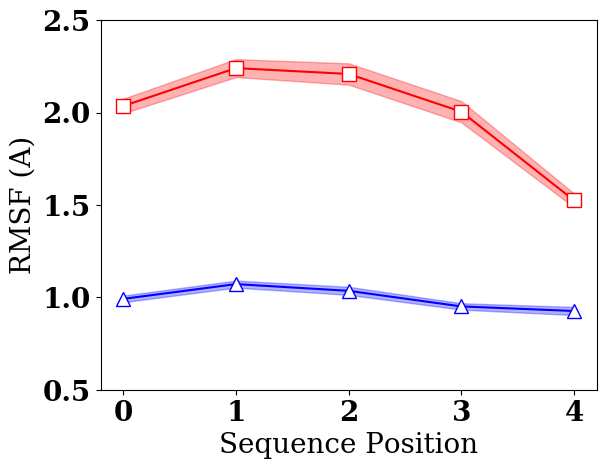

In [13]:
# Need to be a little creative in how I'm going to compare the polyreactive and non-polyreactive antibodies that aren't 2G02
# 43g10 is weird in that the max is nowhere near the center. Shouldn't matter much because RMSF is quite flat over time


cen_find = 'midpoint' # or 'flexMax'

if cen_find == 'flexMax':
    cenLoc_338e6 = list(avg_338e6).index(max(avg_338e6)); cenLoc_43g10 = int(np.floor(len(avg_43g10)/2))
    cenLoc_4c05 = list(avg_4c05).index(max(avg_4c05)); cenLoc_ch65 = list(avg_ch65).index(max(avg_ch65))
    cenLoc_2g02 = list(avg_2g02).index(max(avg_2g02)); cenLoc_cr9114 = list(avg_cr9114).index(max(avg_cr9114))
    cenLoc_2g02mut = list(avg_2g02mut).index(max(avg_2g02mut)); cenLoc_1f02 = list(avg_1f02).index(max(avg_1f02))
    cenLoc_3b03 = list(avg_3b03).index(max(avg_3b03)); cenLoc_f16 = list(avg_f16).index(max(avg_f16))
elif cen_find == 'midpoint':
    cenLoc_43g10 = int(np.floor(len(avg_43g10)/2)); cenLoc_338e6 = int(np.floor(len(avg_338e6)/2))
    cenLoc_4c05 = int(np.floor(len(avg_4c05)/2)); cenLoc_ch65 = int(np.floor(len(avg_ch65)/2))
    cenLoc_2g02 = int(np.floor(len(avg_2g02)/2)); cenLoc_cr9114 = int(np.floor(len(avg_cr9114)/2))
    cenLoc_2g02mut = int(np.floor(len(avg_2g02mut)/2)); cenLoc_1f02 = int(np.floor(len(avg_1f02)/2))
    cenLoc_3b03 = int(np.floor(len(avg_3b03)/2)); cenLoc_f16 = int(np.floor(len(avg_f16)/2))

# Compile the polyreactive and non-poylreactive antibodies into single datasets
polyreact = np.vstack((compile_2g02[loop][:,cenLoc_2g02-2:cenLoc_2g02+3],compile_338e6[loop][:,cenLoc_338e6-2:cenLoc_338e6+3],
compile_43g10[loop][:,cenLoc_43g10-2:cenLoc_43g10+3],compile_f16[loop][:,cenLoc_f16-2:cenLoc_f16+3],
compile_1f02[loop][:,cenLoc_1f02-2:cenLoc_1f02+3],compile_cr9114[loop][:,cenLoc_cr9114-2:cenLoc_cr9114+3],compile_ch65[loop][:,cenLoc_ch65-2:cenLoc_ch65+3]))

nonpoly = np.vstack((compile_4c05[loop][:,cenLoc_4c05-2:cenLoc_4c05+3],compile_3b03[loop][:,cenLoc_3b03-2:cenLoc_3b03+3]))

avg_poly,std_poly = ctb.rmsf_boot(polyreact,totTime1=8700,num_reps = 10000,loop=-1)

avg_nonpoly,std_nonpoly = ctb.rmsf_boot(nonpoly,totTime1=2000,num_reps = 10000,loop=-1)

avg_poly = avg_poly*10; std_poly = std_poly*10
avg_nonpoly = avg_nonpoly*10; std_nonpoly = std_nonpoly*10

pl.plot(avg_poly,marker='^',color='blue',markersize=10,markerfacecolor='white')
pl.fill_between(np.arange(len(avg_poly)),avg_poly+std_poly*2,avg_poly-std_poly*2,alpha=0.3,color='blue')
pl.plot(avg_nonpoly,marker='s',color='red',markersize=10,markerfacecolor='white')
pl.fill_between(np.arange(len(avg_poly)),avg_nonpoly+std_nonpoly*2,avg_nonpoly-std_nonpoly*2,alpha=0.3,color='red')

pl.ylabel('RMSF (A)')
pl.xlabel('Sequence Position')
pl.ylim([0.5,2.5])

#pl.savefig('rmsf_avg_cdr3l.pdf',format='pdf')

# Alright now we need to calculate the statistics for whatever particular loop you're looking at.

Note that if you wanted to do a statistical comparison between, say, 338E6 and 2G02, it's a little difficult because they are of different loop lengths. Need to add in the option loc=[4,5,6] or whatever positions you want to analyze. You may need to pre-process and shift the relative positions for better comparisons? If you do pre-process and pull out these positions, you can set loop=-1 to say "just analyze these input vectors as-is".

[9.9990001e-05 9.9990001e-05 9.9990001e-05 9.9990001e-05 9.9990001e-05]


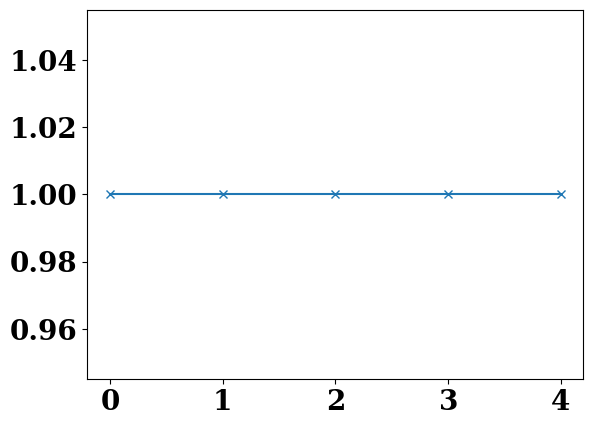

In [14]:
### This one is for calculating p-value differences between 2G02 and the 2G02 mutant
#p_val = ctb.rmsf_stats(compile_2g02,compile_2g02mut,totTime1=2000,totTime2=2000,num_reps = 10000,loop=5)
# This one is for looking at the above compiled RMSF across all antibdies
p_val = ctb.rmsf_stats(polyreact,nonpoly,totTime1=8700,totTime2=2000,num_reps = 10000,loop=-1)

sig_true = []
for i in p_val:
    if i < 0.05:
        sig_true = sig_true + [1]
    else:
        sig_true = sig_true + [0]
print(p_val)

pl.plot(sig_true,marker='x')

# Final step for visualizing replicas and making sure they're relatively consistent for RMSF

Unfortunately need to hard-change out every specific for every simulation. Not ideal but is what it is

Text(0, 0.5, 'RMSF (A)')

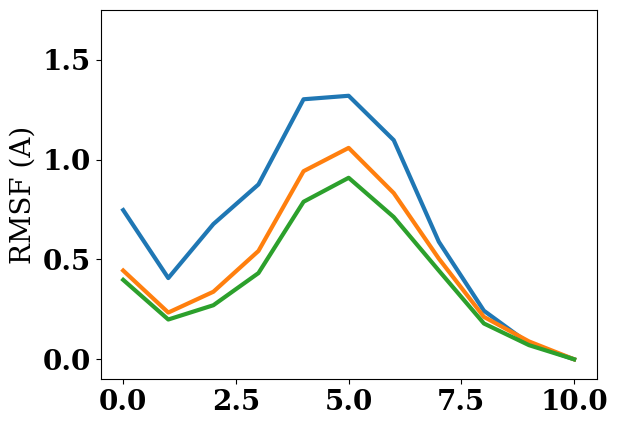

In [18]:
dd = 250
x = ctb.get_rmsf(amber_a2g02_rmsf,'2g02',dyns=dd)
y = ctb.reshape_rmsf(x,N_nanosecond = 1000,dyns=dd)

dd = 130
x2 = ctb.get_rmsf(amber2_a2g02_rmsf,'2g02',dyns=dd)
y2 = ctb.reshape_rmsf(x2,N_nanosecond = 500,dyns=dd)

dd = 250
x3 = ctb.get_rmsf(namd_a2g02_rmsf,'2g02',dyns=dd)
y3 = ctb.reshape_rmsf(x3,N_nanosecond = 500,dyns=dd)

loop = 0

pl.plot((y[loop]-min(y[loop]))*10,linewidth=3)
pl.plot((y2[loop]-min(y2[loop]))*10,linewidth=3)
pl.plot((y3[loop]-min(y3[loop]))*10,linewidth=3)

pl.ylim([-0.1,1.75])
pl.ylabel('RMSF (A)')

#pl.savefig('cdr1L_reps_cr9114.pdf',format='pdf')